<a href="https://colab.research.google.com/github/YanjunLin-Andrie/FanaticFi_top15_college_data/blob/main/FF_top15_college_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [276]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from sklearn import svm
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

### Data referrence:

`College Basketball 2009-2021 + NBA Advanced Stats` by Aditya Jumar

Click [here](https://www.kaggle.com/datasets/adityak2003/college-basketball-players-20092021) for more information

2022 Draft Data were collected from nba.com, click [here](https://www.nba.com/stats/draft/history/) for more information

In [277]:
# Upload cc_default.csv to Colab
from google.colab import files

# csv_file = files.upload()

# Load data and fill blank cells with 0
df_all = pd.read_csv(Path('CollegeBasketballPlayers2009-2022.csv'), low_memory = False)
df_all = df_all.fillna(0)
df_all

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,0,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,0,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,0,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65034,Aquan Smart,FIU,CUSA,21,11.7,69.4,17.7,32.1,36.08,1.8,...,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0.00000
65035,Chase Barrs,Florida A&M,SWAC,14,11.0,85.1,8.8,42.9,40.61,5.4,...,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0.00000
65036,Hugo Clarkin,Sacramento St.,BSky,16,22.8,99.7,7.8,70.6,68.67,2.9,...,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0.00000
65037,James Graham III,Maryland,B10,7,1.8,9.4,17.1,0.0,0.00,0.0,...,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0.00000


In [278]:
# Build model with 2009-2021 data

df = df_all.loc[df_all['year'] < 2022]

# 2022 data will be test data

In [279]:
# Create a column to hold Group data
df.loc[:,'Group'] = 0
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65,Group
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,0,6.22026,0
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,0,3.94375,0
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,0,10.92680,0
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0,6.77427,0
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,0,0.00000,0


---
## Find top 15
### Binary Classification

In [280]:
# Create groups based on ranks
for index, row in df.iterrows():
    if row['pick'] <= 15 and row['pick'] > 0:
        df.at[index,'Group'] = 1
    else:
        df.at[index,'Group'] = 0
    
df

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65,Group
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,0,6.22026,0
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,0,3.94375,0
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,0,10.92680,0
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0,6.77427,0
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,0,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61056,Trey Patterson,Villanova,BE,2,0.3,60.5,19.3,0.0,0.00,0.0,...,0.0000,0.0000,0.0000,0.5000,0.5000,0.0000,0.0000,Pure PG,0.00000,0
61057,Stavros Polatoglou,Northwestern St.,Slnd,4,1.3,28.3,7.1,0.0,0.00,7.0,...,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,C,0.00000,0
61058,Sandy Ryan,Tulane,Amer,1,0.1,0.0,0.0,0.0,0.00,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.00000,0
61059,Ty Larson,Texas Tech,B12,1,0.1,0.0,0.0,0.0,0.00,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.00000,0


In [281]:
# Select from the following to be X
df.columns

Index(['player_name', 'team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG',
       'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA',
       'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per',
       'blk_per', 'stl_per', 'ftr', 'yr', 'ht', 'num', 'porpag', 'adjoe',
       'pfr', 'year', 'pid', 'type', 'Rec Rank', 'ast/tov', 'rimmade',
       'rimmade+rimmiss', 'midmade', 'midmade+midmiss',
       'rimmade/(rimmade+rimmiss)', 'midmade/(midmade+midmiss)', 'dunksmade',
       'dunksmiss+dunksmade', 'dunksmade/(dunksmade+dunksmiss)', 'pick',
       'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
       'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk',
       'pts', 'Unnamed: 64', 'Unnamed: 65', 'Group'],
      dtype='object')

In [282]:
# Creates X by using specific statistics
features = ['GP','Min_per', 'ftr', 'pts', 'ORB_per', 'DRB_per', 'blk_per', 'stl_per', 'dporpag', 'porpag', 'AST_per', 'TO_per', 'FT_per']

In [283]:
# Set Feature and Target
X = df[features]
y = df['Group']

In [284]:
# Review Grouped data size
y.value_counts()

0    60779
1      282
Name: Group, dtype: int64

### The data is very imballanced and `Under Sampling` procedures are taken to revise the dataset to train ML models

## Under sampling

Referrence:

`Undersampling Algoriths for Imbalanced Classification` by Jason Brownlee PhD 

Click [here](https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/) for more information

In [285]:
# Import imbalanced-learn
import imblearn
print(imblearn.__version__)

0.8.1


###Methods that select examples to KEEP
---
####1. Near Miss Undersampling
NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples.

NearMiss-2: Majority class examples with minimum average distance to three furthest minority class examples.

NearMiss-3: Majority class examples with minimum distance to each minority class example.

In [286]:
# Undersample imbalanced dataset with NearMiss-1
from collections import Counter
from imblearn.under_sampling import NearMiss

# define the undersampling method
undersample = NearMiss(version=2, n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 282, 1: 282})


### Performace repport:
*   NM1 best performing model: SVC .82 accuracy, class 1 F1 score .81
*   NM2 best performing model: AdaBoost .99 accuracy, class 1 F1 score .99
*   NM3 best performing model: SVC .79 accuracy, class 1 F1 score .80

---
###Methods that select examples to KEEP
####2. Condensed Nearest Neighbor Rule Underssampling
Seeks a subset of a collection of samples that results in no loss in model performance, referred to as a minimal consistent set.

It’s a relatively slow procedure, so small datasets and small k values are preferred.

In [287]:
# # Import method library
# from imblearn.under_sampling import CondensedNearestNeighbour
# from collections import Counter
# # define the undersampling method
# undersample = CondensedNearestNeighbour(n_neighbors=1)
# # transform the dataset
# X, y = undersample.fit_resample(X, y)
# # summarize the new class distribution
# counter = Counter(y)
# print(counter)

### Performace repport:
*   CNN best performing model: DNN with .86 accuracy, class 1 F1 score .47

---
###Methods that select examples to DELETE
####Tomek Links for Undersampling
A criticism of the Condensed Nearest Neighbor Rule is that examples are selected randomly, especially initially.

Tomek Links finds pairs of examples, one from each class; they together have the smallest Euclidean distance to each other in feature space. These cross-class pairs are now generally referred to as “Tomek Links” and are valuable as they define the class boundary.

In [288]:
# # Import method library
# from imblearn.under_sampling import TomekLinks
# from collections import Counter
# # define the undersampling method
# undersample = TomekLinks()
# # transform the dataset
# X, y = undersample.fit_resample(X, y)
# # summarize the new class distribution
# counter = Counter(y)
# print(counter)

### Performace repport:
*   Tomek Links best performing model: DNN with 1.0 accuracy and class 1 F1 score .23 

---
###Combinations of KEEP and DELETE methods
####1. One-Sided Selection for Undersampling
One-Sided Selection, or OSS for short, is an undersampling technique that combines Tomek Links and the Condensed Nearest Neighbor (CNN) Rule.

In [289]:
# # Import method library
# from imblearn.under_sampling import OneSidedSelection
# from collections import Counter
# # define the undersampling method
# undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
# # transform the dataset
# X, y = undersample.fit_resample(X, y)
# # summarize the new class distribution
# counter = Counter(y)
# print(counter)

### Performace repport:
*   OSS best performing model: AdaBoost with .98 accuracy and class 1 F1 score .25 

---
###Combinations of KEEP and DELETE methods
####2. Neighborhood Cleaning Rule for Undersampling
The Neighborhood Cleaning Rule, or NCR for short, is an undersampling technique that combines both the Condensed Nearest Neighbor (CNN) Rule to remove redundant examples and the Edited Nearest Neighbors (ENN) Rule to remove noisy or ambiguous examples.

In [290]:
# # Import method library
# from imblearn.under_sampling import NeighbourhoodCleaningRule
# from collections import Counter
# # define the undersampling method
# undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
# # transform the dataset
# X, y = undersample.fit_resample(X, y)
# # summarize the new class distribution
# counter = Counter(y)
# print(counter)

### Performace repport:
*   NCR best performing model: AdaBoost with 1.0 accuracy and class 1 F1 score .16

---
##The best undersampling method for FanaticFi Top15 data is: **NearMiss Version 2**
##The best ML model under that undersampling method is: **AdaBoost** `accuracy` .99 and class 1 `F1` score .99

---
##Split and Scale data

In [291]:
# Split dataset into train, test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1)

In [292]:
# Initiate the scaler
X_scaler = StandardScaler()

# Fit the scaler to the features dataset
X_scaler = X_scaler.fit(X)

In [293]:
# Scale train, test datasets
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Machine Learning with preprocessed data


*   Support Vector Classifier (SVC)
*   Deceision Tree
*   Logistic Regression
*   AdaBoost
*   Deep Neural Network

---
## Use the SVC classifier model

In [294]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0])

In [295]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        65
           1       1.00      0.95      0.97        76

    accuracy                           0.97       141
   macro avg       0.97      0.97      0.97       141
weighted avg       0.97      0.97      0.97       141



---
## Use Ddceision Tree

In [298]:
# Import decision tree classifier from SKLearn
from sklearn import tree

# Initiate the model instance
dtc = tree.DecisionTreeClassifier()

# Fit the model using the training data
dtc_model = dtc.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
dtc_pred = dtc_model.predict(X_test_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
dtc_testing_report = classification_report(y_test, dtc_pred)

# Print the classification report
print(dtc_testing_report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        65
           1       0.99      0.97      0.98        76

    accuracy                           0.98       141
   macro avg       0.98      0.98      0.98       141
weighted avg       0.98      0.98      0.98       141



---
## Use Logistic Regression

In [299]:
# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Create an instance of the LogisticRegression model
lr = LogisticRegression()

# Fit the model using the training data
lr_model = lr.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
lr_pred = lr_model.predict(X_test_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
lr_testing_report = classification_report(y_test, dtc_pred)

# Print the classification report
print(lr_testing_report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        65
           1       0.99      0.97      0.98        76

    accuracy                           0.98       141
   macro avg       0.98      0.98      0.98       141
weighted avg       0.98      0.98      0.98       141



---
## Use AdaBoost

In [300]:
# Import AdaBoost classifier from SKLearn
from sklearn.ensemble import AdaBoostClassifier

# Initiate the model instance
abc = AdaBoostClassifier()

# Fit the model using the training data
abc_model = abc.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
abc_pred = abc_model.predict(X_test_scaled)

# Use a classification report to evaluate the model using the predictions and testing data
abc_testing_report = classification_report(y_test, abc_pred)

# Print the classification report
print(abc_testing_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        65
           1       1.00      0.97      0.99        76

    accuracy                           0.99       141
   macro avg       0.99      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141



##Save the best performing model

In [318]:
import pickle
# save the model
AdaBoostClassifier = open("abc.pkl","wb")
pickle.dump(abc_model,AdaBoostClassifier) 
AdaBoostClassifier.close() 

---
## Use Deep Neural Network

In [301]:
# Define number of nodes on each layer
input_features = 13
layer1 = 40
layer2 = 30
layer3 = 10

# Initiate the model
nn = Sequential()

In [302]:
# Add all layers to the model
nn.add(Dense(
    units = layer1, 
    input_dim = input_features, 
    activation = 'relu'
))

nn.add(Dense(
    units = layer2, 
    activation = 'relu'
))

nn.add(Dense(
    units = layer3, 
    activation = 'relu'
))

# Add output layer
nn.add(Dense(units=1, activation = 'sigmoid'))

In [303]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

In [304]:
# Fit the model
deep_net_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 0.2435 - accuracy: 0.5910
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.8322
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9220
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.1157 - accuracy: 0.9338
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0844 - accuracy: 0.9338
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0661 - accuracy: 0.9338
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0550 - accuracy: 0.9409
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0479 - accuracy: 0.9504
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0419 - accuracy: 0.9574
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0369 - accuracy: 0.9622
Epoch 11/

In [305]:
# Print loss and accuracy score of training set
loss, accuracy = nn.evaluate(X_train_scaled, y_train, verbose=2)

14/14 - 0s - loss: 0.0024 - accuracy: 0.9976 - 123ms/epoch - 9ms/step


In [306]:
# Print loss and accuracy score of testing set
val_loss, val_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

5/5 - 0s - loss: 0.0330 - accuracy: 0.9645 - 22ms/epoch - 4ms/step


In [307]:
X_test_scaled

array([[-0.19755913, -0.70478077,  0.69525395, ...,  0.37247641,
        -0.50228366,  1.16738428],
       [ 0.22503259, -0.52843413,  0.18754506, ..., -0.32008412,
         0.27771749, -1.24858714],
       [ 1.21107994,  0.67843821,  2.79978918, ..., -0.76896595,
        -0.08066142, -0.9907562 ],
       ...,
       [ 0.92935213,  0.73905736, -1.37652587, ...,  1.02656136,
        -0.03849919,  0.86180687],
       [ 0.3658965 ,  1.49404143,  0.13841194, ..., -0.29443373,
        -0.46012144,  0.9668491 ],
       [-0.90187867, -0.64416161,  0.31856671, ..., -0.10205581,
         0.2987986 ,  0.63262381]])

In [308]:
y_test

47     0
246    0
509    1
458    1
358    1
      ..
236    0
405    1
523    1
304    1
16     0
Name: Group, Length: 141, dtype: int64

In [309]:
deep_net_pred = nn.predict(X_test_scaled)
deep_net_pred[:10]

array([[3.9285421e-04],
       [8.7796003e-02],
       [9.9750519e-01],
       [9.9999774e-01],
       [9.9999863e-01],
       [9.9999207e-01],
       [1.8781745e-06],
       [9.9998832e-01],
       [9.9988592e-01],
       [2.3701787e-04]], dtype=float32)

In [310]:
import numpy as np
deep_net_pred = np.where(deep_net_pred > .5, 1, 0)


In [311]:
# deep_net_pred = nn.predict(X_test_scaled)
from itertools import chain
pred = list(chain(*deep_net_pred))
import numpy as np
array = np.asarray(pred)
array[:10]

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [312]:
deep_net_classification_report = classification_report(y_test, array)

# Print the classification report
print(deep_net_classification_report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        65
           1       0.99      0.95      0.97        76

    accuracy                           0.96       141
   macro avg       0.96      0.97      0.96       141
weighted avg       0.97      0.96      0.96       141



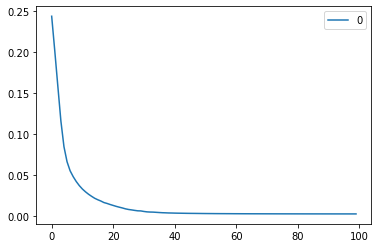

In [313]:
# Plot the loss rate
loss_df = pd.DataFrame(deep_net_model.history['loss'])
loss_df.plot()

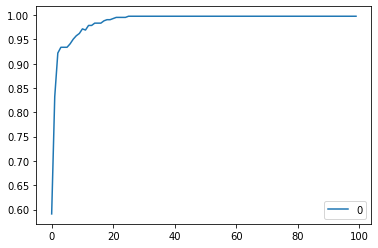

In [314]:
# Plot the accuracy score
accuracy_df = pd.DataFrame(deep_net_model.history['accuracy'])
accuracy_df.plot()

---
## Using LazyPredict


In [315]:
# Install LazyPRedict
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# After installation, restart Runtime and proceed to the next cell

In [1]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Upload cc_default.csv to Colab
from google.colab import files
# csv_file = files.upload()
# Load data and fill blank cells with 0
df_all = pd.read_csv(Path('CollegeBasketballPlayers2009-2022.csv'), low_memory = False)
df_all = df_all.fillna(0)

# Build model with 2009-2021 data
df = df_all.loc[df_all['year'] < 2022]
# 2022 data will be test data

# Create a column to hold Group data
df.loc[:,'Group'] = 0

# Create groups based on ranks
for index, row in df.iterrows():
    if row['pick'] <= 15 and row['pick'] > 0:
        df.at[index,'Group'] = 1
    else:
        df.at[index,'Group'] = 0


# Creates X by using specific statistics
features = ['GP','Min_per', 'ftr', 'pts', 'ORB_per', 'DRB_per', 'blk_per', 'stl_per', 'dporpag', 'porpag', 'AST_per', 'TO_per', 'FT_per']
# Set Feature and Target
X = df[features]
y = df['Group']

# Import imbalanced-learn
import imblearn
# Undersample imbalanced dataset with NearMiss
from collections import Counter
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where

# define the undersampling method
undersample = NearMiss(version=2, n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)


# Re-split the train, test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
# Initiate the scaler
X_scaler = StandardScaler()
# Fit the scaler to the features dataset
X_scaler = X_scaler.fit(X)
# Scale train, test datasets
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Train the new datasets
lc = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
lc_predictions = lc.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# Print the model
print(lc_predictions)

100%|██████████| 29/29 [00:02<00:00, 11.10it/s]

(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.99               0.99     0.99      0.99   
RandomForestClassifier             0.98               0.98     0.98      0.98   
QuadraticDiscriminantAnalysis      0.98               0.98     0.98      0.98   
SVC                                0.98               0.98     0.98      0.98   
LGBMClassifier                     0.98               0.98     0.98      0.98   
XGBClassifier                      0.98               0.98     0.98      0.98   
BaggingClassifier                  0.97               0.97     0.97      0.97   
DecisionTreeClassifier             0.97               0.97     0.97      0.97   
NuSVC                              0.96               0.97     0.97      0.96   
GaussianNB                         0.96               0.96     0.96      0.96   
AdaBoostClassifier         

---
##The best ML model under **NearMiss Version 2** undersampling method is: **ExtraTreesClassifier** `accuracy` .99 and class 1 `F1` score .99